## HW6_Noise
#### 휴먼지능정보공학과
#### Name : 김영서
#### Student number : 201910787
<br>
<br>

### Exercise 4.1

''A Soft Murmur'' is a web site that plays a mixture of natural noise sources, including rain, waves, wind, etc. At http://asoftmurmur.com/about/ you can find their list of recordings, most of which are at http://freesound.org.

Download a few of these files and compute the spectrum of each signal. Does the power spectrum look like white noise, pink noise, or Brownian noise? How does the spectrum vary over time?
<br>

### Solution

In [1]:
import thinkdsp
import thinkplot

%matplotlib inline

http://freesound.org 에서 다운받은 natural noise sources인 rain.wav는 다음과 같다.

In [2]:
wave = thinkdsp.read_wave('rain.wav')
wave.make_audio()

전체 wave 중 한 부분을 짧게 segment하였다.

In [3]:
segment = wave.segment(start=1.5, duration=1.0)
segment.make_audio()

그리고 spectrum은 다음과 같다.

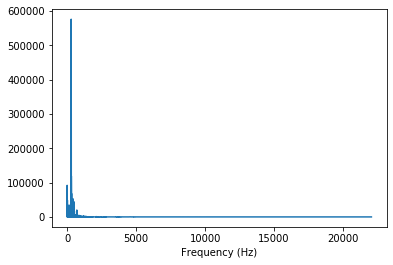

In [4]:
spectrum = segment.make_spectrum()
spectrum.plot_power()
thinkplot.config(xlabel='Frequency (Hz)')

Amplitude는 frequency와 함께 떨어지므로 아마 이 음원은 **red noise** 또는 **pink noise**이다. 이를 power spectrum에서 log-log scale으로 확인 가능하다.

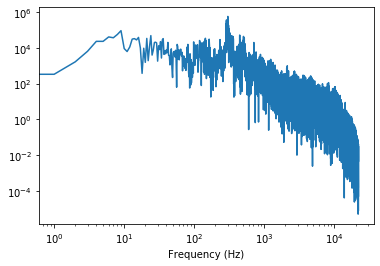

In [5]:
spectrum.plot_power()
thinkplot.config(xlabel='Frequency (Hz)',
                 xscale='log', 
                 yscale='log')

이 구조는 increasing과 decreasing하는 amplitude이며 이는 natural noise source에 자주 나타난다.

대략 $f = 10^2 $ 이상에서,선형적으로 drop off된다.

다른 segement에서 나타나는 시간에 따른 변화는 다음과 같다.

In [6]:
segment2 = wave.segment(start=10, duration=1.0)
segment2.make_audio()

두개의 spectrum으로 plot한 것은 다음과 같다.

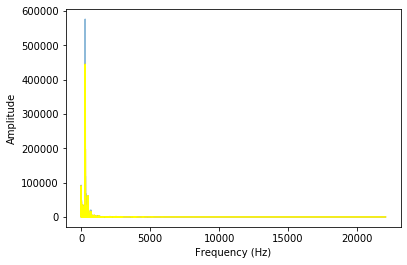

In [7]:
spectrum2 = segment2.make_spectrum()

spectrum.plot_power(alpha=0.5)
spectrum2.plot_power(alpha=0.5)
spectrum2.plot_power(color='yellow')
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude')

다시, log-log scale로 plotthing power 하면 다음과 같다.

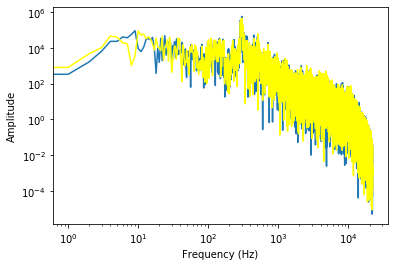

In [8]:
spectrum.plot_power()
spectrum2.plot_power(color='yellow')
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude',
                 xscale='log', 
                 yscale='log')

구조가 아까와 비슷한 것을 볼 수 있다. 또 spectrogram은 다음과 같다.

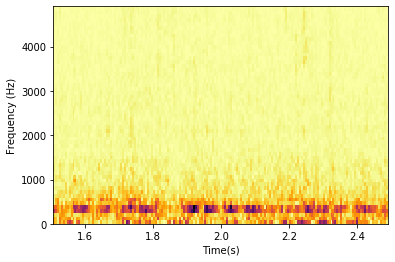

In [11]:
segment.make_spectrogram(512).plot(high=5000)
thinkplot.config(xlabel='Time(s)', ylabel='Frequency (Hz)')

이 segment 내에서, 전체적으로 amplitude가 drops off 하는 것을 볼 수 있다. 

그러나 주파수들의 mixture은 consistent하다.